<center>
    <h1>Inteligencia Artificial</h1>
    <h1>Aprendizaje no Supervisado</h1>
    <h1>Agrupamiento Jerárquico</h1>
    <h1></h1>
    <h5>Prof. Wladimir Rodriguez</h5>
    <h5>wladimir.rodriguez@outlook.com</h5>
    <h5>Departamento de Computación</h5>
</center>

# Aprendizaje no Supervisado: Agrupamiento Jerárquico

En esta sección, veremos un enfoque alternativo a la agrupación basada en prototipos: agrupamiento jerárquico. Una ventaja de los algoritmos de agrupación jerárquica es que nos permite graficar dendrogramas (visualizaciones de una agrupación jerárquica binaria), lo que puede ayudar con la interpretación de los resultados mediante la creación de taxonomías significativas. Otra ventaja útil de este enfoque jerárquico es que no necesitamos especificar el número de grupos por adelantado.

Los dos enfoques principales para la agrupación jerárquica son agrupamientos jerárquicos aglomerativos y divisivos. En la agrupación jerárquica divisiva, comenzamos con un grupo que abarca todas nuestras muestras, y dividimos iterativamente el grupo en grupos más pequeños hasta que cada grupo solo contenga una muestra. En esta sección, nos enfocaremos
en el agrupamiento aglomerativo, que toma el enfoque opuesto. Comenzamos con cada muestra como un grupo individual y fusionamos los pares más cercanos de grupos hasta que solo queda un grupo.

Los dos algoritmos estándar para la agrupación jerárquica aglomerativa son enlace único y enlace completo. Usando enlaces individuales, calculamos las distancias entre los miembros más similares para cada par de grupos y fusionamos los dos grupos para los cuales la distancia entre los miembros más similares es la más pequeña. El enfoque de vinculación completa es similar al enlace único pero, en lugar de comparar los miembros más similares en cada par de grupos, comparamos los miembros más diferentes para realizar la fusión. Esto se muestra en el siguiente diagrama:

<img src='../figuras/EnlaceUnicoCompleto.png' width='100%'>

### Pasos para la Agrupamiento Jerárquico Aglomerativo

En esta sección, nos centraremos en el agrupamiento aglomerativo utilizando el enfoque de vinculación completo. Este es un procedimiento iterativo que se puede resumir en los siguientes pasos:

1. Calcule la matriz de distancia de todas las muestras.
2. Represente cada punto de datos como un grupo.
3. Fusiona los dos grupos más cercanos según la distancia de los miembros más disímiles (distantes).
4. Actualice la matriz de similitud.
5. Repita los pasos 2 a 4 hasta que quede un solo grupo.

### Calcular la matriz de distancias

Ahora discutiremos cómo calcular la matriz de distancia (paso 1). Pero primero, generemos algunos datos de muestra aleatorios para trabajar. Las filas representan diferentes observaciones (ID_0 a ID_4), y las columnas son los diferentes atributos (X, Y, Z) de esas muestras:

In [1]:
import pandas as pd
import numpy as np
np.random.seed(1)
variables = ['X', 'Y', 'Z']
etiquetas = ['ID_0','ID_1','ID_2','ID_3','ID_4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=variables, index=etiquetas)
df

,X,Y,Z
ID_0,4.170220,7.203245,0.001144
ID_1,3.023326,1.467559,0.923386
ID_2,1.862602,3.455607,3.967675
ID_3,5.388167,4.191945,6.852195
ID_4,2.044522,8.781174,0.273876


Para calcular la matriz de distancia como entrada para el algoritmo de agrupamiento jerárquico, usaremos la función `pdist` del submódulo `spatial.distance` de SciPy:

In [2]:
from scipy.spatial.distance import pdist, squareform

matriz_distancias = pd.DataFrame(squareform(
    pdist(df, metric='euclidean')),
    columns=etiquetas, index=etiquetas)

matriz_distancias

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,5.921486,5.924800,7.582099,2.661359
ID_1,5.921486,0.000000,3.816715,6.940139,7.407354
ID_2,5.924800,3.816715,0.000000,4.614354,6.483742
ID_3,7.582099,6.940139,4.614354,0.000000,8.689952
ID_4,2.661359,7.407354,6.483742,8.689952,0.000000


Con este código, calculamos la distancia euclidiana entre cada par de puntos de muestra en nuestro conjunto de datos en función de las características X, Y y Z. Proporcionamos la matriz de distancia condensada-devuelta por `pdist`, como entrada a la función `squareform` para crear un matriz simétrica de las distancias.

### Calcular la matriz de vinculación

A continuación, aplicaremos la aglomeración de vinculación completa a nuestros grupos utilizando la función `linkage` del submódulo `cluster.hierarchy` de SciPy, que devuelve la matriz de vinculación.

Para usar esta función debemes pasarle como entrada Una matriz de distancia condensada o redundante. Una matriz de distancia condensada es una matriz plana que contiene la parte triangular superior de la matriz de distancia. Esta es la forma que `pdist` retorna.

In [3]:
from scipy.cluster.hierarchy import linkage

grupos = linkage(pdist(df, metric='euclidean'), method='complete')

Para visualizar al resultado del agrupamiento podemos usar Pandas como se muestra a continuación:

In [4]:
pd.DataFrame(grupos,
             columns=['etiqueta fila 1', 'etiqueta fila 2',
                      'distancia', '# de elemantos en grupo'],
             index=['grupo %d' %(i+1) for i in range(grupos.shape[0])])

,etiqueta fila 1,etiqueta fila 2,distancia,# de elemantos en grupo
grupo 1,0.0,4.0,2.661359,2.0
grupo 2,1.0,2.0,3.816715,2.0
grupo 3,3.0,6.0,6.940139,3.0
grupo 4,5.0,7.0,8.689952,5.0


Como se muestra en la tabla, la matriz de vinculación consta de varias filas donde cada fila representa una combinación. La primera y la segunda columna denotan los miembros más diferentes en cada grupo, y la tercera fila informa la distancia entre esos miembros. La última columna devuelve la cantidad de miembros en cada grupo.

### Visualización la matriz de vinculación como un dendograma

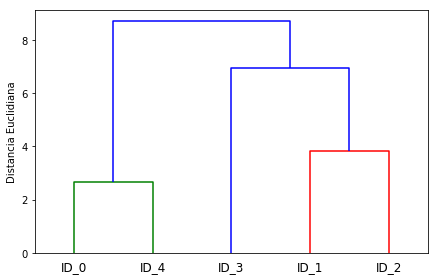

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

dendograma = dendrogram(grupos, labels=etiquetas)
plt.tight_layout()
plt.ylabel('Distancia Euclidiana')
plt.show()

El dendrograma resume los diferentes grupos que se formaron durante la agrupación jerárquica aglomerativa; por ejemplo, podemos ver que las muestras ID_0 e ID_4, seguidas por ID_1 e ID_2, son las más similares basadas en la métrica de distancia euclidiana.

### Visualizar Dendograma junto a un Mapa de Calor (Heatmap)

En aplicaciones prácticas, los dendrogramas de agrupamiento jerárquico a menudo se usan en combinación con un mapa de calor, que nos permite representar los valores individuales en la matriz de muestra con un código de color. En esta sección, discutiremos cómo adjuntar un dendrograma a un diagrama de mapa de calor y ordenaremos las filas en el mapa de calor correspondiente.

Procedimeinto para adjuntar un dendograma a un mapa de calor:

1. Creamos un nuevo objeto `figure` y definimos la posición del eje x, la posición del eje y, el ancho y la altura del dendrograma a través del atributo `add_axes`. Además, rotamos el dendrograma 90 grados en el sentido contrario a las agujas del reloj. El código es el siguiente:

/Users/wladimir/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


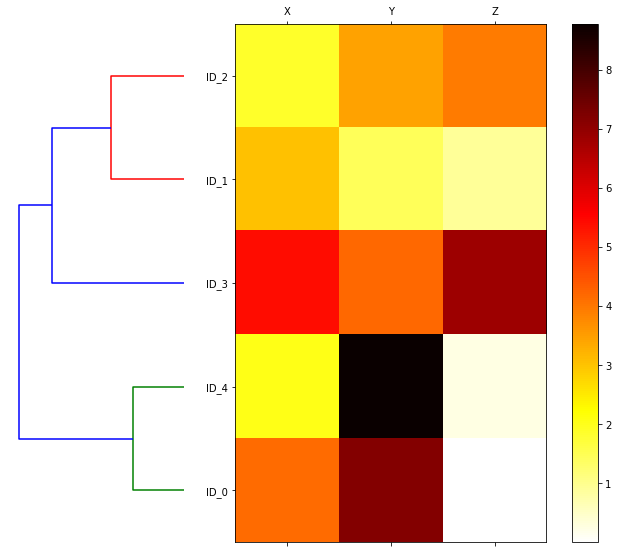

In [6]:
# graficar dendrogram 
fig = plt.figure(figsize=(12, 12), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# rotar dendograma 90 grados
row_dendr = dendrogram(grupos, orientation='left')

# reordenar los datos con respecto al agrupamiento
df_rowclust = df.ix[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remover los ejes del dendrograma
for i in axd.spines.values():
        i.set_visible(False)

# graficar el mapa de calor (heatmap)
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

plt.show()

### Agrupamiento Jerárquico con scikit-learn

En esta sección, vimos cómo realizar agrupamientos jerárquicos aglomerativos
usando SciPy. Sin embargo, también hay una implementación AgglomerativeClustering en scikit-learn, que nos permite elegir la cantidad de clústeres que queremos devolver. Esto es útil si queremos podar el árbol de agrupamiento jerárquico. Configurando
el parámetro `n_cluster` a 2, ahora agruparemos las muestras en dos grupos utilizando el mismo enfoque de vinculación completo basado en la métrica de distancia euclidiana como antes:

In [7]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
etiquetas = ac.fit_predict(X)
print('Etiquetas grupos: %s' % etiquetas)

Etiquetas grupos: [1 0 0 0 1]


## Agrupamiento Espacial Basado en la Densidad de Aplicaciones con Ruido (DBSCAN)

Otro enfoque para el agrupamineto es el agrupamiento espacial basado en la densidad de aplicaciones con ruido (DBSCAN). La noción de densidad en DBSCAN se define como la cantidad de puntos dentro de un radio especificado ε.

En DBSCAN, se asigna una etiqueta especial a cada muestra (punto) utilizando los siguientes criterios:
- Un punto se considera como punto central si al menos un número específico (MinPts) de puntos vecinos cae dentro del radio especificado ε
- Un punto de borde es un punto que tiene menos vecinos que MinPts dentro de ε, pero se encuentra dentro del radio ε de un punto central
- Todos los demás puntos que no son centrales ni de borde se consideran como
  puntos de ruido

Después de etiquetar los puntos como central, de borde o de ruido, el algoritmo DBSCAN se puede resumir en dos simples pasos:
1. Forme un clúster separado para cada punto central o un grupo conectado de puntos centrales (los puntos centrales se conectan si no están más lejos que ε).
2. Asigne cada punto de frontera al clúster de su punto central correspondiente.

En la siguiente figura se muestra el resultado de DBSCAN, donde se puede ver los puntos centrales, los puntos de borde y los puntos de ruido :

<img src='../figuras/DBSCAN.png' width='100%'>

Una de las principales ventajas de utilizar DBSCAN es que no supone que los grupos tengan una forma esférica como en k-means. Además, DBSCAN es diferente de a k-means y el agrupamiento jerárquico, ya que no asigna necesariamente cada punto a un grupo, pero es capaz de eliminar los puntos de ruido.
Para un ejemplo más ilustrativo, creemos un nuevo conjunto de datos en forma de media luna para comparar la agrupación en k-means, la agrupación jerárquica y DBSCAN:

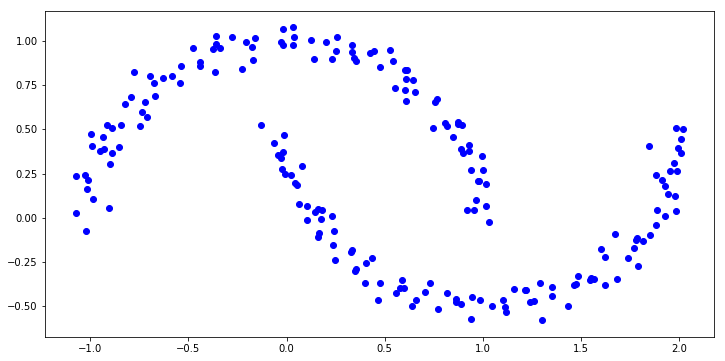

In [27]:
from sklearn.datasets import make_moons, make_circles

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

plt.figure(figsize=(12, 6))
plt.scatter(X[:,0], X[:,1], c='blue')
plt.show()

Comenzaremos utilizando el algoritmo de k-medias y agrupamiento jerárquico para ver si uno de los algoritmos de agrupamiento previamente discutidos puede identificar con éxito las formas de media luna como grupos separados. El código es el siguiente:

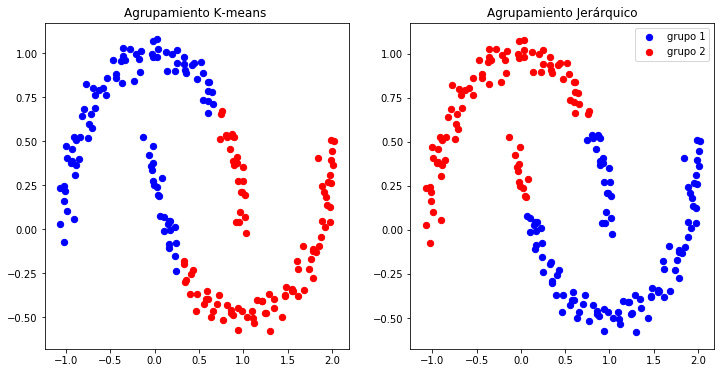

In [40]:
from sklearn.cluster import KMeans

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

kmeans = KMeans(n_clusters=2, random_state=0)
y_kmeans = kmeans.fit_predict(X)
ax1.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], c='blue', marker='o', s=40, label='grupo 1')
ax1.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], c='red', marker='o', s=40, label='grupo 2')
ax1.set_title('Agrupamiento K-means ')

jerarquico = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_jerarquico = jerarquico.fit_predict(X)
ax2.scatter(X[y_jerarquico==0,0], X[y_jerarquico==0,1], c='blue', marker='o', s=40, label='grupo 1')
ax2.scatter(X[y_jerarquico==1,0], X[y_jerarquico==1,1], c='red', marker='o', s=40, label='grupo 2')
ax2.set_title('Agrupamiento Jerárquico')
plt.legend()
plt.show()

En función de la visualización de los resultados de la agrupación, podemos ver que ni el algoritmo k-means ni el algoritmo de agrupamiento jerárquico pueden separar los dos grupos.

Finalmente, probemos el algoritmo DBSCAN en este conjunto de datos para ver si puede encontrar los dos grupos en forma de media luna usando un enfoque basado en la densidad:

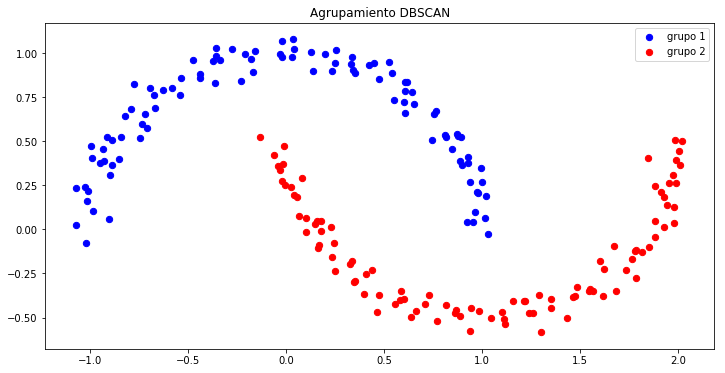

In [29]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_dbscan = dbscan.fit_predict(X)

plt.figure(figsize=(12, 6))
plt.scatter(X[y_dbscan==0,0], X[y_dbscan==0,1], c='blue', marker='o', s=40, label='grupo 1')
plt.scatter(X[y_dbscan==1,0], X[y_dbscan==1,1], c='red', marker='o', s=40, label='grupo 2')
plt.title('Agrupamiento DBSCAN')
plt.legend()
plt.show()

El algoritmo DBSCAN puede detectar con éxito las formas de media luna, lo que resalta uno de los puntos fuertes de DBSCAN (agrupamiento de datos de formas arbitrarias)

### Otro Ejemplo con Datos en Forma de Circulos

Generemos datos no esféricos y graficamos las grupos reales.

Text(0.5,1,'Agrupamiento DBSCAN')

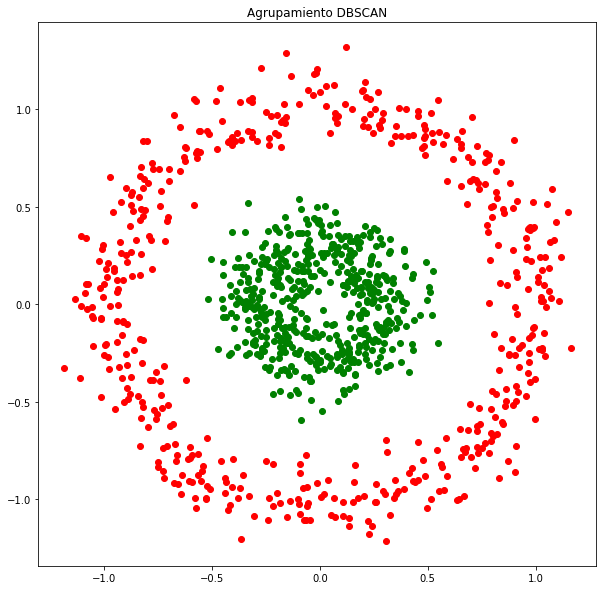

In [45]:
# Generar datos no esféricos.
X1, y1 = make_circles(n_samples=1000, factor=0.3, noise=0.1)

# Graficar los datos
plt.figure(figsize=(10, 10))
plt.plot(X1[y1 == 0, 0], X1[y1 == 0, 1], 'ro')
plt.plot(X1[y1 == 1, 0], X1[y1 == 1, 1], 'go')
plt.title('Agrupamiento DBSCAN')

### K-means y Agrupamiento Jerárquico

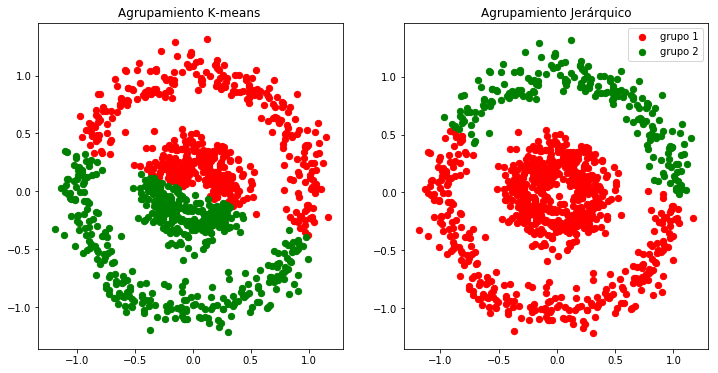

In [46]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

kmeans1 = KMeans(n_clusters=2, random_state=0)
y1_kmeans = kmeans1.fit_predict(X1)
ax1.scatter(X1[y1_kmeans==0,0], X1[y1_kmeans==0,1], c='red', marker='o', s=40, label='grupo 1')
ax1.scatter(X1[y1_kmeans==1,0], X1[y1_kmeans==1,1], c='green', marker='o', s=40, label='grupo 2')
ax1.set_title('Agrupamiento K-means ')

jerarquico1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y1_jerarquico = jerarquico1.fit_predict(X1)
ax2.scatter(X1[y1_jerarquico==0,0], X1[y1_jerarquico==0,1], c='red', marker='o', s=40, label='grupo 1')
ax2.scatter(X1[y1_jerarquico==1,0], X1[y1_jerarquico==1,1], c='green', marker='o', s=40, label='grupo 2')
ax2.set_title('Agrupamiento Jerárquico')
plt.legend()
plt.show()

### DBSCAN

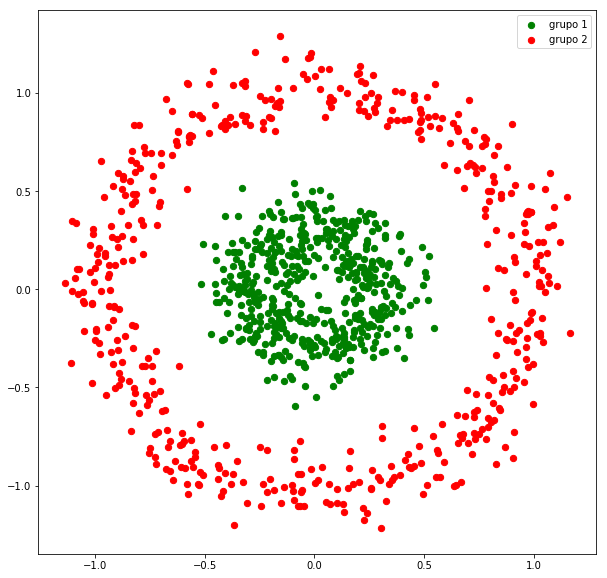

In [55]:
dbscan1 = DBSCAN(eps=0.15, min_samples=5, metric='euclidean')
y1_dbscan = dbscan1.fit_predict(X1)

plt.figure(figsize=(10, 10))
plt.scatter(X1[y1_dbscan==0,0], X1[y1_dbscan==0,1], c='green', marker='o', s=40, label='grupo 1')
plt.scatter(X1[y1_dbscan==1,0], X1[y1_dbscan==1,1], c='red', marker='o', s=40, label='grupo 2')
plt.legend()
plt.show()

### Comparación de los Algoritmos de Agrupamiento

Para la comparación de los algoritmos de agrupamiento, utilizaremos el famoso conjunto de datos [Zachary's Karate Club](https://github.com/LearnDataSci/article-resources/blob/master/Karate%20Club%20Clustering/zachary1977.pdf). 

Esencialmente había un club de karate que tenía un administrador "John A" y un instructor "Mr. Hi", y surgió un conflicto entre ellos que causó que los estudiantes se dividieran en dos grupos; uno que siguió a John y otro que siguió al Mr. Hi.

Los estudiantes son los nodos en nuestro gráfico, y los bordes, o enlaces, entre los nodos son el resultado de interacciones sociales fuera del club entre estudiantes.

Como hubo una división eventual en dos grupos (clusters) al final de la disputa del club de karate, y sabemos en qué grupo terminó cada estudiante, podemos usar los resultados como valores de verdad para nuestro agrupamiento para medir el rendimiento entre diferentes algoritmos.

In [56]:
from sklearn import cluster
import networkx as nx
from collections import defaultdict
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

Importemos el conjunto de datos directamente desde `networkx` y también configuremos el `spring_layout` para la graficación:

In [151]:
Grafo = nx.karate_club_graph()

posicion = nx.spring_layout(G)

Crea una función para visualizar el conjunto de datos:

In [152]:
def dibujar_comunidades(Grafo, membrecia, posicion):
    """Dibuja los nodos en un gráfico con colores asignados para cada grupo individual
    Parámetros
    ----------
    Grafo : grafo networkx 
    membrecia : lista
        Una lista donde la posición es el estudiante y el valor de la posición es la membresía al club estudiantil.
        Ejemplo. `print(membrecia[8]) --> 1` significa que el estudiante #8 es un miembro del club 1.
    posición : position como un networkx spring layout
        Ejemplo. nx.spring_layout(Grafo)
    """ 
    fig, ax = plt.subplots(figsize=(16,9))
    
    # Convertir la lista de membrecia a un diccionario donde clave=club, valor=lista de estudiantes del club
    club_dict = defaultdict(list)
    for estudiante, club in enumerate(membrecia):
        club_dict[club].append(estudiante)
    
    # Normalizar número de clubs para seleccionar un color
    norm = plt.Normalize(vmin=0, vmax=len(club_dict.keys()))
    
    for club, miembros in club_dict.items():
        nx.draw_networkx_nodes(Grafo, posicion,
                               nodelist=miembros,
                               node_color=cm.jet(norm(club)),
                               node_size=500,
                               alpha=0.8,
                               ax=ax)

    # Dibujar aristas (conecciones sociales) y mostrar gráfico final
    plt.title("Zachary's Karate Club")
    nx.draw_networkx_edges(Grafo, posicion, alpha=0.5, ax=ax)

Para colorear los nodos de los estudiantes de acuerdo con la membresía de su club, estamos usando la clase Normalize de matplotlib para que coincida con el número de clubes en el intervalo (0, 1). Tal vez se pregunte por qué tenemos que hacer esto cuando solo hay dos clubes como resultado del estudio, pero es posible que alguno de los algoritmos de agrupación no agrupen correctamente y que sea necesario colorear más de dos clubes.

Para comparar el rendimiento de nuestro algoritmo, queremos las etiquetas verdaderas, es decir, donde cada alumno terminó después de la división del club. Desafortunadamente, las etiquetas verdaderas no se proporcionan en el conjunto de datos de networkx, pero podemos recuperarlas del estudio mismo y codificarlas aquí:

In [153]:
# Etiquetas verdadears del grupo en donde cada estudiante termino.
y_verdadero = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Ahora, usemos nuestra función de `dibujar_comunidades` para visualizar la verdadera membresía del club de estudiantes y sus conexiones sociales:

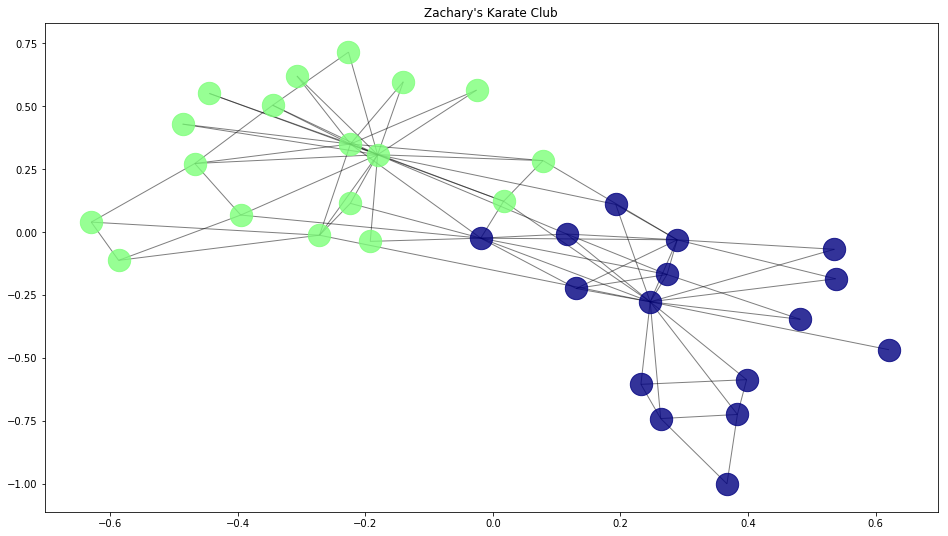

In [154]:
dibujar_comunidades(Grafo, y_verdadero, posicion)

Esta es la verdadera división del Karate Club. Veremos cómo funcionan nuestros algoritmos cuando intenten agrupar los datos.

Antes de eso, necesitamos preprocesar los datos transformando el grafo en una matriz, ya que ese es el formato requerido para los algoritmos de agrupamiento:

In [155]:
def grafo_a_matriz_incidencia(Grafo):
    """Convierte el networkx grafo en una matriz de incidencia.
   
    Parámetros
    ----------
    Grafo : grafo de networkx
    """
    # Inicializar con zeros la matriz de incidencia
    matriz_incidencia = np.zeros((len(G), len(G)), dtype=int)

    # Loop to set 0 or 1 (diagonal elements are set to 1)
    for nodo in Grafo:
        for vecino in G.neighbors(nodo):
            matriz_incidencia[nodo][vecino] = 1
        matriz_incidencia[nodo][nodo] = 1

    return matriz_incidencia

In [156]:
matriz_incidencia = grafo_a_matriz_incidencia(Grafo)
matriz_incidencia

array([[1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

Aplicar los algoritmos de agrupamiento: K-means, Agrupamiento Jerárquico y DBSCAN

In [157]:
k_grupos = 2
resultados = []
algoritmos = {}

algoritmos['kmeans'] = cluster.KMeans(n_clusters=k_grupos, n_init=200)

algoritmos['jerarquico'] = cluster.AgglomerativeClustering(n_clusters=k_grupos, linkage="ward")

algoritmos['spectral'] = cluster.SpectralClustering(n_clusters=k_grupos, affinity="precomputed", n_init=200)


for modelo in algoritmos.values():
    modelo.fit(matriz_incidencia)
    resultados.append(list(modelo.labels_))

## Métricas y Graficado

Bueno, es hora de elegir qué algoritmo es más adecuado para nuestros datos. Una simple visualización del resultado podría funcionar en pequeños conjuntos de datos, pero imagine un gráfico con mil, o incluso diez mil nodos. Eso sería un poco caótico para el ojo humano. Entonces, calcule el Adjusted Rand Score (ARS) y las métricas de Normalized Mutual Information (NMI) para una interpretación más fácil.

### Normalized Mutual Information (NMI)

La información mutua de dos variables aleatorias es una medida de la dependencia mutua entre las dos variables. La Información Mutua Normalizada es una normalización del puntaje de Información Mutua (MI) para escalar los resultados entre 0 (sin información mutua) y 1 (correlación perfecta). En otras palabras, 0 significa disímil y 1 significa
una combinación perfecta.

### Adjusted Rand Score (ARS)

Por otro lado,  Adjusted Rand Score calcula una medida de similitud entre dos grupos. ARS considera todos los pares de muestras y cuenta los pares que se asignan en el mismo o a diferentes grupos en los grupos predichos y verdaderos. Donde, 0 es la similitud más baja y 1 es la más alta.

Para trazar nuestros puntajes, primero los calculamos. Recuerde que `y_verdadero` todavía es un diccionario donde la clave es un estudiante y el valor es el club en el que terminaron. Necesitamos obtener primero los valores de `y_verdadero` para compararlos con `y_predicha`:

In [158]:
nmi_resultados = []
ars_resultados = []

#y_verdadero_valor = list(y_verdadero.values())

for y_predicha in resultados:
    nmi_resultados.append(normalized_mutual_info_score(y_verdadero, y_predicha))
    ars_resultados.append(adjusted_rand_score(y_verdadero, y_predicha))

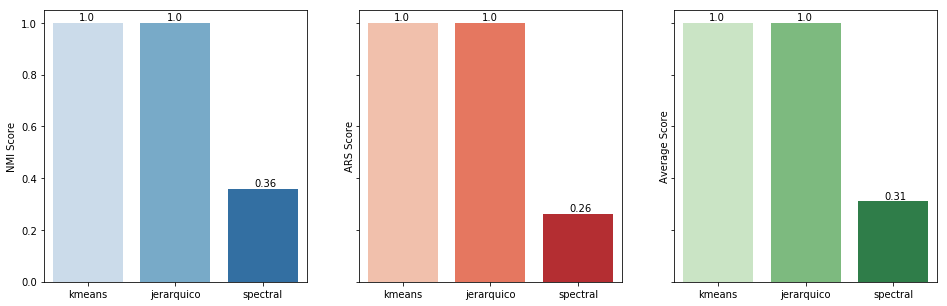

In [159]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16, 5))

x = np.arange(3)
avg = [sum(x) / 2 for x in zip(nmi_resultados, ars_resultados)]

xlabels = list(algoritmos.keys())

sns.barplot(x, nmi_resultados, palette='Blues', ax=ax1)
sns.barplot(x, ars_resultados, palette='Reds', ax=ax2)
sns.barplot(x, avg, palette='Greens', ax=ax3)

ax1.set_ylabel('NMI Score')
ax2.set_ylabel('ARS Score')
ax3.set_ylabel('Average Score')

# # Add the xlabels to the chart
ax1.set_xticklabels(xlabels)
ax2.set_xticklabels(xlabels)
ax3.set_xticklabels(xlabels)

# Add the actual value on top of each bar
for i, v in enumerate(zip(nmi_resultados, ars_resultados, avg)):
    ax1.text(i - 0.1, v[0] + 0.01, str(round(v[0], 2)))
    ax2.text(i - 0.1, v[1] + 0.01, str(round(v[1], 2)))
    ax3.text(i - 0.1, v[2] + 0.01, str(round(v[2], 2)))

# Show the final plot
plt.show()

Como puede ver en la tabla resultante, K-means y Agrupamiento Jerárquico tienen el mejor resultado posible para nuestro conjunto de datos. La técnica de agrupamiento espectral aplica la agrupación a una proyección del Laplaciano normalizado. Cuando se trata de agrupar imágenes, la agrupación espectral funciona bastante bien.

Por curiosidad, creemos una nueva función para graficar donde cada algoritmo salió mal al comparar los grupos de estudiantes predichos con los verdaderos grupos de estudiantes:

In [160]:
def dibujar_verdadero_vs_predicho(Grafo, y_verdadero, y_predicho, posicion, nombre_algo, ax):
    
    for estudiante, club in y_verdadero.items():
        if y_predicho is not None:
            if club == y_predicho[estudiante]:
                nodo_color = [0, 1, 0]
                nodo_forma = 'o'
            else:
                nodo_color = [0, 0, 0]
                nodo_forma = 'X'
                
        nx.draw_networkx_nodes(Grafo, posicion,
                               nodelist=[estudiante],
                               node_color=nodo_color,
                               node_size=250,
                               alpha=0.7,
                               ax=ax,
                               node_shape=nodo_forma)
    
    # Dibujar aristas y mostrar gráfico final
    ax.set_title(nombre_algo)
    nx.draw_networkx_edges(Grafo, posicion, alpha=0.5, ax=ax)

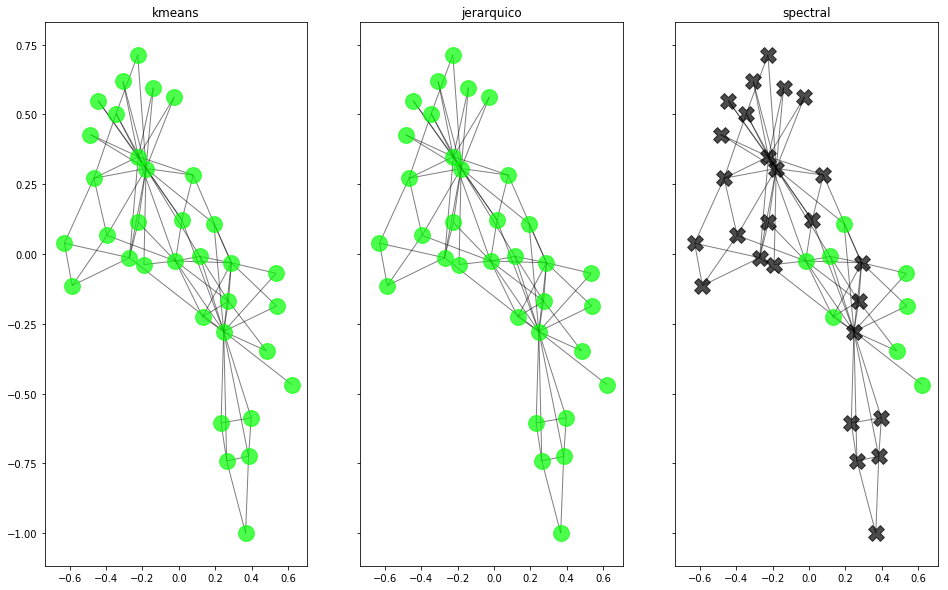

In [161]:
y_verdadero_dict = dict(enumerate(y_verdadero))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16, 10))

for nombre_algo, ax in zip(algoritmos.keys(), [ax1, ax2, ax3]):
    dibujar_verdadero_vs_predicho(Grafo, y_verdadero_dict, algoritmos[nombre_algo].labels_, posicion, nombre_algo, ax)